In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error, classification_report, confusion_matrix, roc_curve, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import scale, StandardScaler
sns.set()

# ***Exploratory data analysis***

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


## ***Features***

In [ ]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## ***Target***

* 0 = Setosa
* 1 = Versicolor
* 2 = Virginica

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## ***Target Names***

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


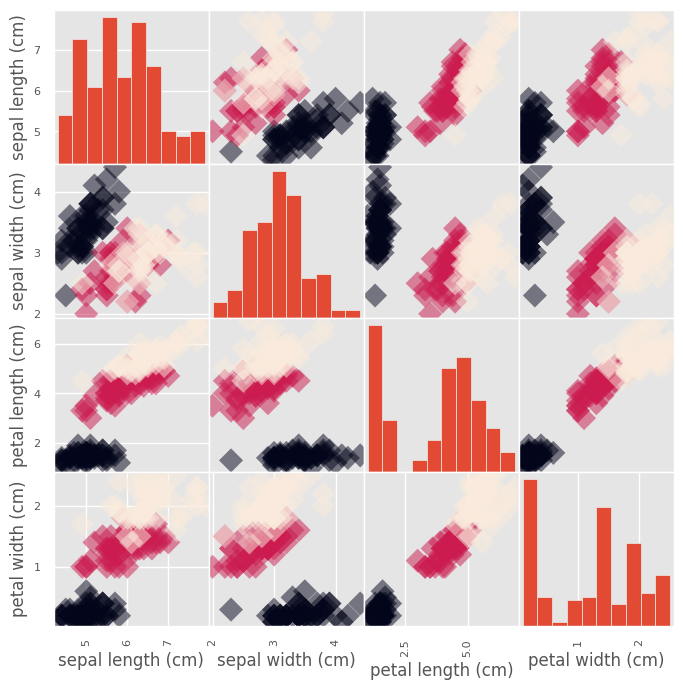

In [ ]:
pd.plotting.scatter_matrix(df, c=iris.target, figsize=(8, 8), s=150, marker='D')
plt.show()

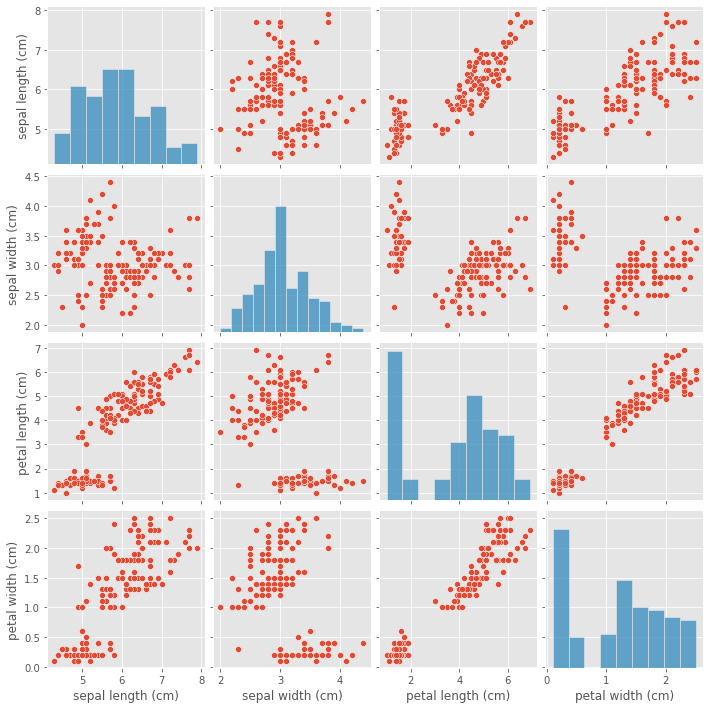

In [ ]:
import seaborn as sns

sns.pairplot(df)
plt.show()

### ***Numerical EDA***

You'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues.

Before thinking about what supervised learning models you can apply to this, however, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data.

### ***Visual EDA***

  `pd.plotting.scatter_matrix()` function is used on the Iris data for this purpose. However, you may have noticed that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's `countplot`.

Given below is a countplot of the 'education' bill, generated from the following code:





In [ ]:
df = pd.read_csv('voting.csv').drop(columns='Unnamed: 0')
#df['party'] = df['party'].map({'republican': 1, 'democrat': 0})
df = df[df['education']!='?']
df = df[df['satellite']!='?']
df = df[df['missile']!='?']


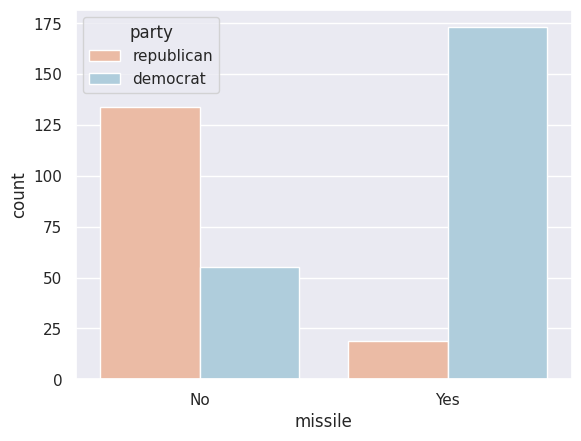

In [ ]:
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

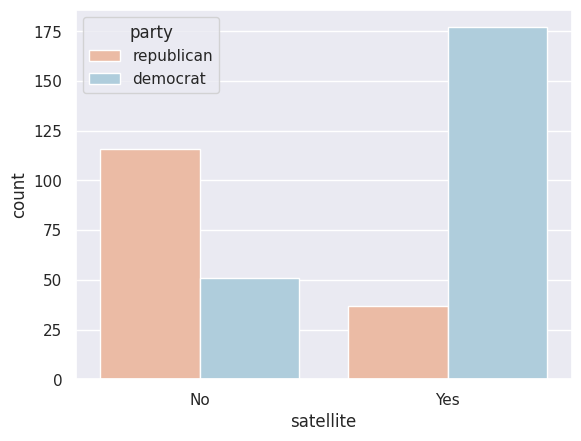

In [ ]:
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

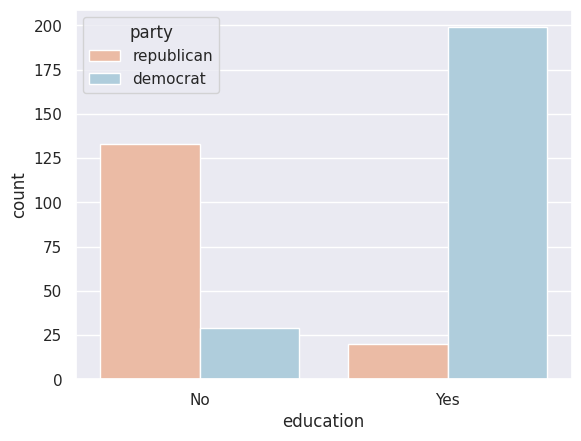

In [ ]:

sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

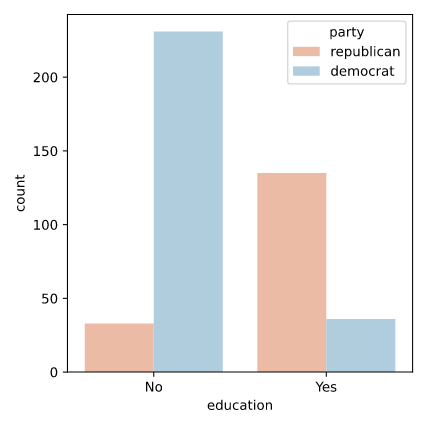

In `sns.countplot()`, we specify the x-axis data to be `'education'`, and `hue` to be `'party'`. Recall that `'party'` is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the `'education'` bill, with each party colored differently. We manually specified the color to be `'RdBu'`, as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

Below are countplots for the  `'satellite'` and `'missile'` bills. Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans?

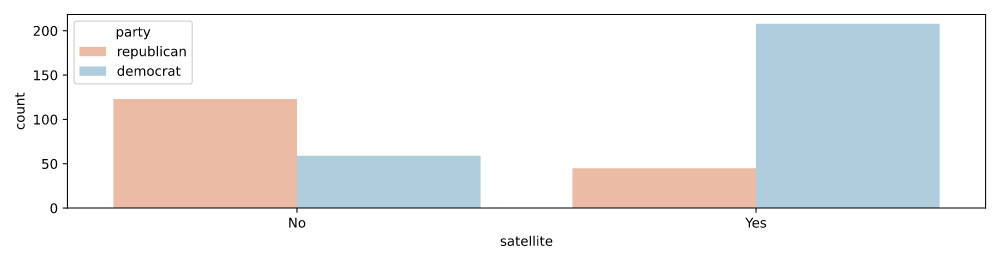

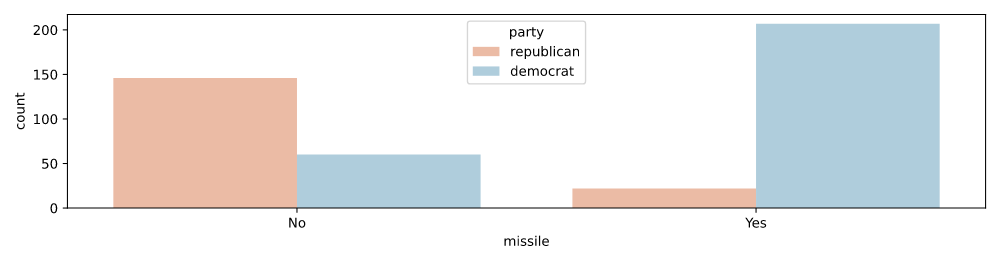

Democrats voted in favor of both `'satellite'` and `'missile'`.



# **k-Nearest Neighbors**

Predict the label of a data point by
- Looking at 'k' closest laeled data points

## **k=3**

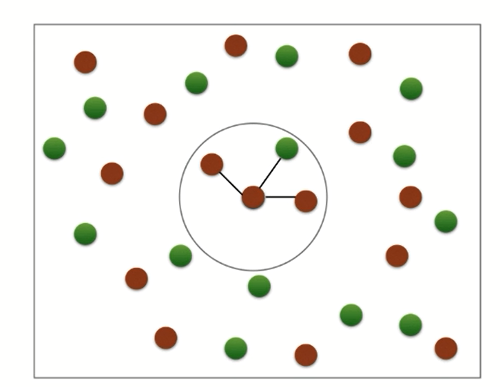

## **k=5**

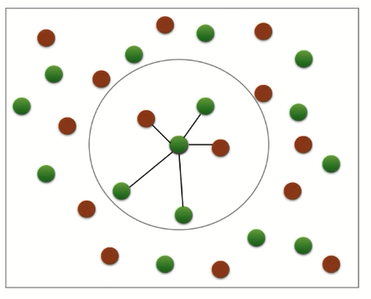

## ***KNN***

- Create decision boundaries

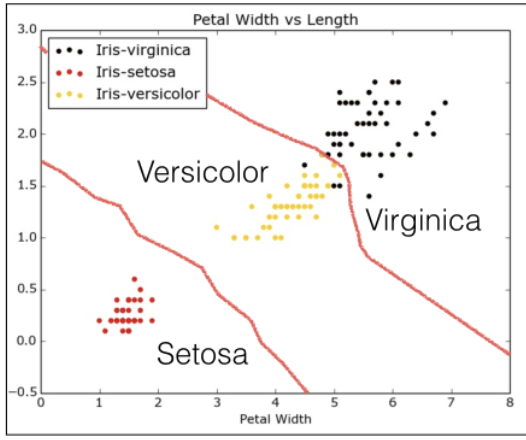

# ***Using scikit-learn to fit a classifier***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

# features จะต้องอยู่ในลักษณะนี้ features เป็นจำนวนคอลัมน์ observations คือจำนวนแถว
print(iris['data'].shape)

# target จะต้องอยู่แบบนี้
print(iris['target'].shape)

(150, 4)
(150,)


# ***Predicting unlabeled data***

In [ ]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                  [5.7, 2.6, 3.8, 1.3],
                  [4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(X_new)
X_new.shape

(3, 4)

In [ ]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


### ***k-Nearest Neighbors: Fit***

Fit a k-Nearest Neighbors classifier to the voting dataset.

The feature array is `X` and the response variable is `y`.

Create an instance of a k-NN classifier with 6 neighbors (by specifying the `n_neighbors` parameter) and then fit it to the data.

* Import `KNeighborsClassifier` from `sklearn.neighbors`.
* Create arrays `X` and `y` for the features and the target variable. Here this has been done. Note the use of `.drop()` to drop the target variable `'party'`
from the feature array `X` as well as the use of the `.values` attribute to ensure `X` and `y` are NumPy arrays. Without using `.values`, `X` and `y` are a `DataFrame` and `Series` respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.

* Instantiate a `KNeighborsClassifier` called `knn` with `6` neighbors by specifying the `n_neighbors` parameter.

Fit the classifier to the data using the `.fit()` method.

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)


### ***k-Nearest Neighbors: Predict***

Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the `.predict()` method on the `X` that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

For now, a random unlabeled data point has been generated and is available as `X_new`. You will use your classifier to predict the label for this new data point, as well as on the training data `X` that the model has already seen. Using `.predict()` on `X_new` will generate `1` prediction, while using it on `X` will generate 435 predictions: `1` for each sample.

The DataFrame has been pre-loaded as `df`. This time, you will create the feature array `X` and target variable array `y` yourself.

* Create arrays for the `features` and the `target` variable from `df`. As a reminder, the target variable is `'party'`.

* Instantiate a `KNeighborsClassifier` with `6` neighbors.
* Fit the classifier to the data.
* Predict the labels of the training data, `X`.
* Predict the label of the new data point `X_new`.

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))


How sure can you be of its predictions? In other words, how can you measure its performance?

# **Evaluate model performance**

- Features must be split into training set and test set.

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn.predict(X_test)

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

In [ ]:
knn.score(X_test, y_test)

0.9555555555555556

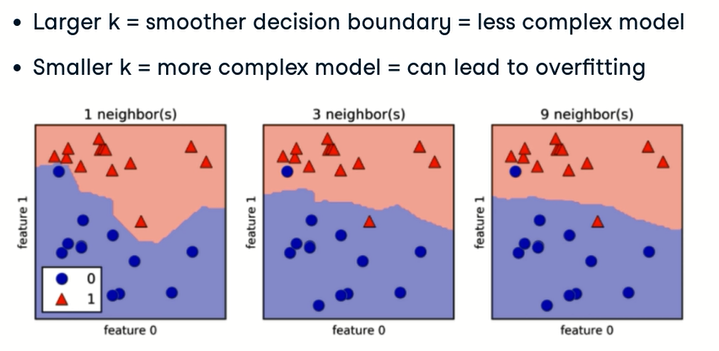

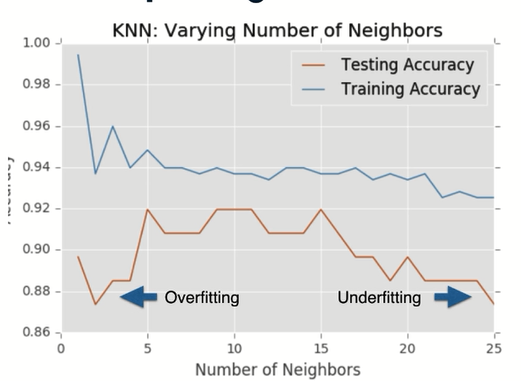





### ***Exercise: The digits recognition dataset***
Iris' target variable takes on three possible outcomes. In this exercises, you'll be working with the [MNIST](http://yann.lecun.com/exdb/mnist/) digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type `Bunch`, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an `'images'` key in addition to the `'data'` and `'target'` keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this `'images'` key is useful for visualizing the images, as you'll see in this exercise. On the other hand, the `'data'` key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the `.` notation, as in `digits.images`, or the `[]` notation, as in `digits['images']`.

* Import datasets from `sklearn` and `matplotlib.pyplot` as `plt`.

* Load the digits dataset using the `.load_digits()` method on datasets.
* Print the keys and `DESCR` of digits.
* Print the shape of `images` and `data` keys using the `.` notation.
* Display the 1011th image using `plt.imshow()`. This has been done.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

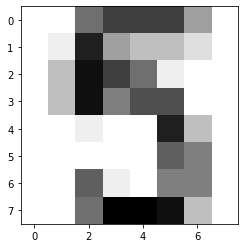

In [ ]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits.data.shape)
print(digits.images.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

It looks like the image in question corresponds to the digit '5'. Now, can you build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset?

### ***Train/Test Split + Fit/Predict/Accuracy***
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

* Import `KNeighborsClassifier` from `sklearn.neighbors` and `train_test_split` from `sklearn.model_selection`.

* Create an array for the features using `digits.data` and an array for the target using `digits.target`.

* Create stratified training and test sets using `0.2` for the size of the test set. Use a random state of `42`. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.

* Create a k-NN classifier with `7` neighbors and fit it to the training data.
Compute and print the accuracy of the classifier's predictions using the `.score()` method.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

digits = datasets.load_digits()
y = digits['target']; X = digits['data']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9833333333333333


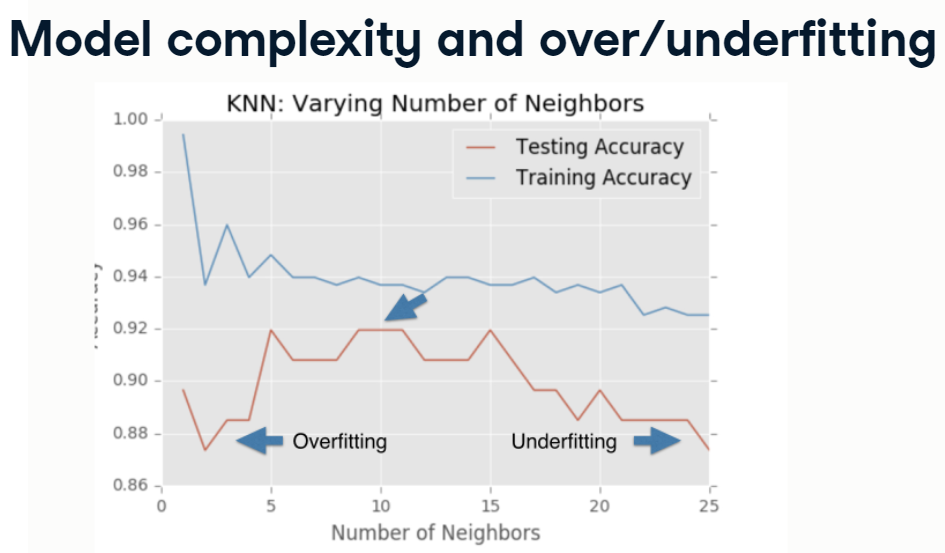

### ***Overfitting and underfitting***

Remember the model complexity curve? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as `X_train`, `X_test`, `y_train`, `y_test`. In addition, `KNeighborsClassifier` has been imported from `sklearn.neighbors`.

Inside the **`for`** loop:
  
  * Setup a k-NN classifier with the number of neighbors equal to `k`.
  * Fit the classifier with `k` neighbors to the training data.
  * Compute accuracy scores the training set and test set separately using the `.score()` method and assign the results to the `train_accuracy` and `test_accuracy` arrays respectively.

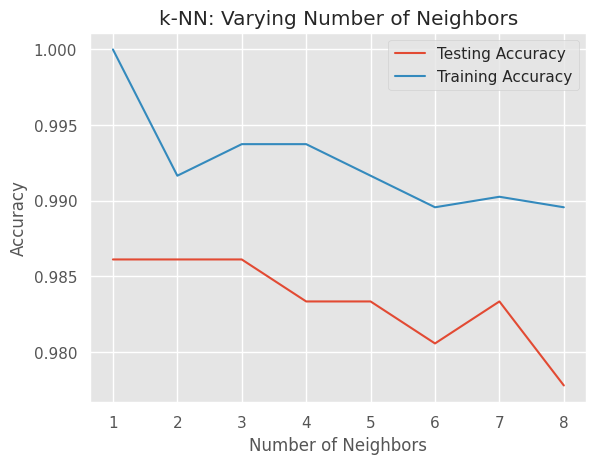

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# ทำไมรูปไม่เหมือน ทั้งๆที่ใช้ชุดข้อมูลเดียวกัน ?

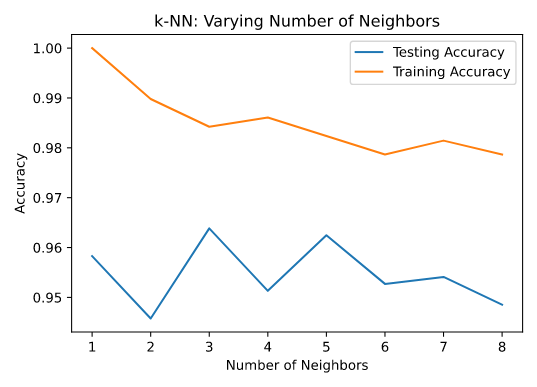

## ใช้ข้อมูลคนละอันกัน ตรวจดูได้จาก X_train

It looks like the test accuracy is highest when using 1 to 3 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

# ***Regression***



In [ ]:
boston = pd.read_csv('boston.csv')
display(boston.head())

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## ***Creating feature and target arrays***

In [ ]:
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

## ***Predicting house value from a single feature***

(506,) (506, 13)


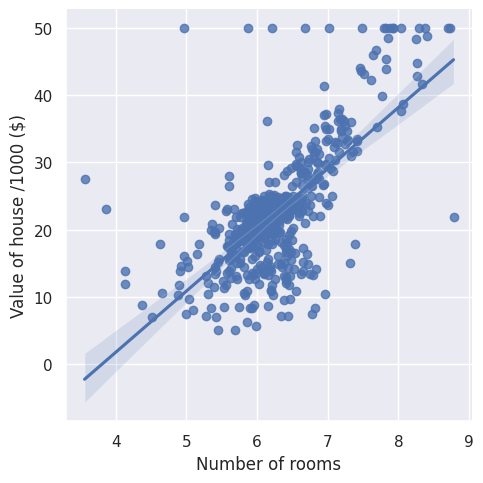

In [ ]:
print(y.shape, X.shape)

sns.lmplot(x='RM', y='MEDV', data=boston)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

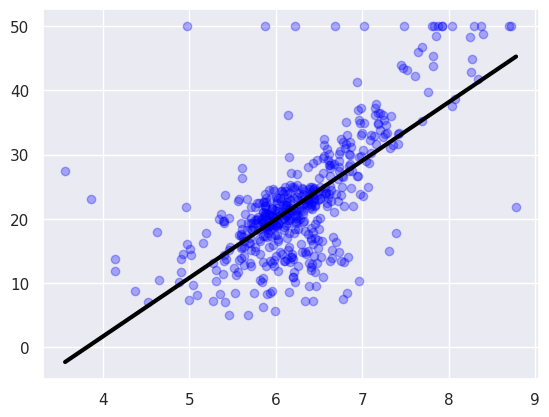

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

X_rooms = boston['RM'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_rooms, y.values.reshape(-1, 1))
prediction_space = np.linspace(min(X_rooms), max(X_rooms))

plt.scatter(X_rooms, y, color='blue', alpha=0.3)
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

### ***Exercise: Importing data for supervised learning***

In this chapter, you will work with Gapminder data  `'gapminder.csv'`. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: `'fertility'`.

You need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's `.reshape()` method.

### **Instructions**

* Read the file `'gapminder.csv'` into a DataFrame df using the `read_csv()` function.

* Create array `X` for the `'fertility'` feature and array `y` for the `'life'` target variable.

* Reshape the arrays by using the `.reshape()` method and passing in `-1` and `1`.

In [ ]:
import numpy as np, pandas as pd

df = pd.read_csv('gapminder.csv')
X, y = df['fertility'].values.reshape(-1, 1), df['life'].values.reshape(-1, 1)
print(X.shape, y.shape)

(139, 1) (139, 1)


Notice the differences in shape before and after applying the `.reshape() `method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

### ***Exercise: Exploring the Gapminder data***

It is important to explore your data before building models. Below is a heatmap showing the correlation between the different features of the Gapminder dataset as `df`. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with `life`, and which ones are negatively correlated? Does this match your intuition?

Explore the DataFrame using pandas methods such as **`.info()`, `.describe()`, `.head()`**.

The heatmap was generated using Seaborn's heatmap function and the following line of code, where `df.corr()` computes the pairwise correlation between columns:



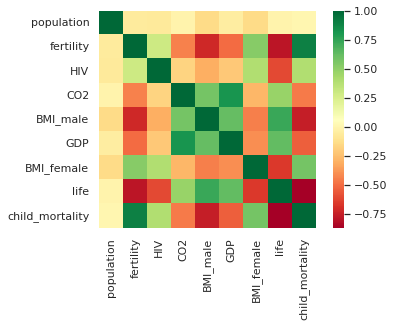

In [ ]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

# ***Linear regression on all features***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

boston = pd.read_csv('boston.csv')
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values#.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print(reg_all.score(X_test, y_test)) # นี่คือ R-squared
print(r2_score(y_test, y_pred))

0.7112260057484944
0.7112260057484944


In [ ]:
from statsmodels.formula.api import ols

model = ols(formula="MEDV ~ CRIM+ ZN+ INDUS+ CHAS+ NX+ RM+ AGE+ DIS+ RAD+ TAX+PTRATIO+ B+ LSTAT", data=boston)
print(model.fit().rsquared)
# ทำไม ไม่เท่า ?

0.7406426641094095


scikit-learn's **`LinearRegression().fit(...)`**:

- You're training on 70% of the data (`X_train`) and testing on 30% (`X_test`).

- So the R² you're printing is the out-of-sample R² (on test data).

statsmodels' **`ols(...).fit().rsquared`**:

- You're fitting and evaluating on the entire dataset.

- So this R² is the in-sample R², which tends to be higher than test R².

In [ ]:
import statsmodels.api as sm
X_ = sm.add_constant(X)
model = sm.OLS(y,X_)
results = model.fit()
results.rsquared

0.7406426641094095

### ***Exercise: Fit & predict for regression***

Use the `'fertility'` feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is `'life'`. The array for the target variable has been pre-loaded as `y` and the array for `'fertility'` has been pre-loaded as `X_fertility`.

A scatter plot with `'fertility'` on the x-axis and `'life'` on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the  score using scikit-learn's `.score()` method.

### **Instructions**

* Import `LinearRegression` from `sklearn.linear_model`.
* Create a `LinearRegression` regressor called `reg`.
* Set up the prediction space to range from the minimum to the maximum of `X_fertility`.
* Fit the regressor to the data (`X_fertility` and `y`) and compute its predictions using the `.predict()` method and the `prediction_space` array.
* Compute and print the  score using the `.score()` method.
* Overlay the plot with your linear regression line.

0.6192442167740035


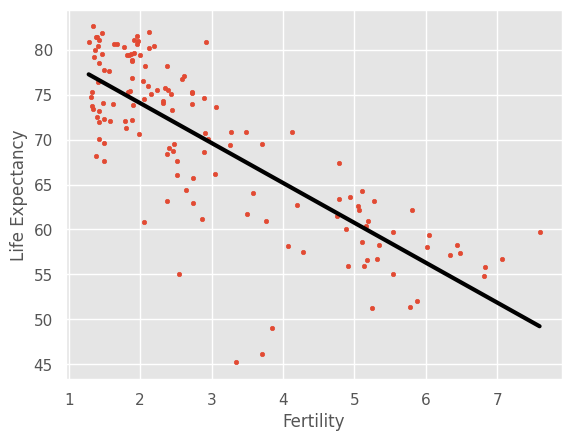

In [ ]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv('gapminder.csv')
X_fertility = df['fertility'].values.reshape(-1, 1)
y = df['life'].values.reshape(-1, 1)
reg = LinearRegression()
predicted_space = np.linspace(X_fertility.min(), X_fertility.max(), 1000)
reg.fit(X_fertility, y)
reg.predict(prediction_space)
print(reg.score(X_fertility, y))

plt.scatter(X_fertility, y, s=10)
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

### ***Exercise: Train/test split for regression***

Train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data.

Split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the  score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array `X` and target variable array `y` have been pre-loaded for you from the DataFrame `df`.

* Import `LinearRegression` from `sklearn.linear_model`, `mean_squared_error` from `sklearn.metrics`, and `train_test_split` from `sklearn.model_selection`.

* Using `X` and `y`, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of `42`.

* Create a linear regression regressor called `reg_all`, fit it to the training set, and evaluate it on the test set.

* Compute and print the  score using the `.score()` method on the test set.

* Compute and print the RMSE. To do this, first compute the Mean Squared Error using the `mean_squared_error()` function with the arguments `y_test` and `y_pred`, and then take its square root using `np.sqrt()`.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd, numpy as np

df = pd.read_csv('gapminder.csv')
X = df.drop(columns=['life', 'Region']).values
y = df['life'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression().fit(X_train, y_train)
print('R^2 =', reg_all.score(X_test, y_test))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, reg_all.predict(X_test))))

R^2 = 0.8380468731429359
RMSE =  3.247601080037723


Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it?

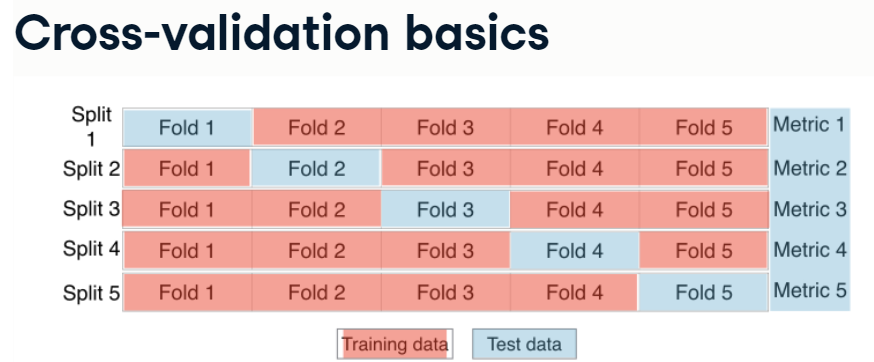



# ***Cross-validation in scikit-learn***

* Default score is $R^2$.

### ***Exercise: 5-fold cross-validation***

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's `cross_val_score()` function uses  as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

### **Instructions**

* Import `LinearRegression` from `sklearn.linear_model` and `cross_val_score` from `sklearn.model_selection`.

* Create a linear regression regressor called `reg`.

* Use the `cross_val_score()` function to perform 5-fold cross-validation on `X` and `y`.

* Compute and print the average cross-validation score. You can use NumPy's `mean()` function to compute the average.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

df = pd.read_csv('gapminder.csv')
X = df.drop(columns=['life', 'Region'])
y = df['life']

reg = LinearRegression()
print(np.mean(cross_val_score(reg, X, y, cv=5)))

0.8599627722793223


### ***Exercise: K-Fold CV comparison***

Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use `%timeit` to see how long each 3-fold CV takes compared to 10-fold CV by executing the following `cv=3` and `cv=10`:

```
%timeit cross_val_score(reg, X, y, cv = ____)
```

### **Instructions**

* Import `LinearRegression` from `sklearn.linear_model` and `cross_val_score` from `sklearn.model_selection`.

* Create a linear regression regressor called `reg`.

* Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
print(cross_val_score(reg, X, y, cv=3).mean())
print(cross_val_score(reg, X, y, cv=10).mean())

0.871871278262211
0.8436128620131145


In [ ]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8718712782622107
0.8436128620131204


In [ ]:
%timeit cross_val_score(reg, X, y, cv=3)

100 loops, best of 5: 6.87 ms per loop


In [ ]:
%timeit cross_val_score(reg, X, y, cv=10)

10 loops, best of 5: 21.8 ms per loop


Did you use `%timeit` in the IPython Shell to see how much longer it takes 10-fold cross-validation to run compared to 3-fold cross-validation?

# ***Ridge regression***

Too many features lead to overfitting

## **Ride regression loss function**

loss function = OLS loss function + $\alpha \cdot \sum_{i=1}^na_i^2$

* เราเป็นคนเลือกค่า $\alpha$  (similar to choosing k in kNN)
  * $\alpha = 0 = OLS ⇒ $ overfit
  * $\alpha$ big $\Rightarrow$ underfit



In [ ]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True) # normalize=True ทำให้ตัวแปรทุกตัวอยู่ในสเกลเดียวกัน

### normalize is removed from sklearn

ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


0.8442469959975751

# ***Lasso regression***

* Loss function = OLS Loss function + $\alpha \sum_{i=1}^n \left|\beta_i\right|$

In [ ]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


0.872129616961354

# ***Lasso regression for feature selection***

* Can be used to select important features of a dataset
* Shrinks the coeffcients of less important features to exactly 0



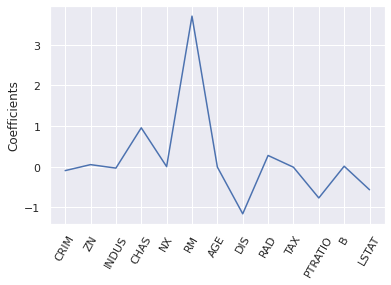

In [ ]:
from sklearn.linear_model import Lasso

boston = pd.read_csv('boston.csv')
names = boston.drop('MEDV', axis=1).columns
X = boston.drop(columns='MEDV').values
y = boston['MEDV'].values

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

The most important factor predicting Houses' prices is number of rooms.

### ***Exercise: Regularization I: Lasso***

You saw how Lasso selected out the `'RM'` feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to `0`. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to `0`, with only the most important ones remaining.

### **Instructions**

* Import `Lasso` from `sklearn.linear_model`.

* Instantiate a `Lasso` regressor with an `alpha` of `0.4` and specify `normalize=True`.

* Fit the regressor to the data and compute the coefficients using the `coef_` attribute.

* Plot the coefficients on the y-axis and column `names` on the x-axis.

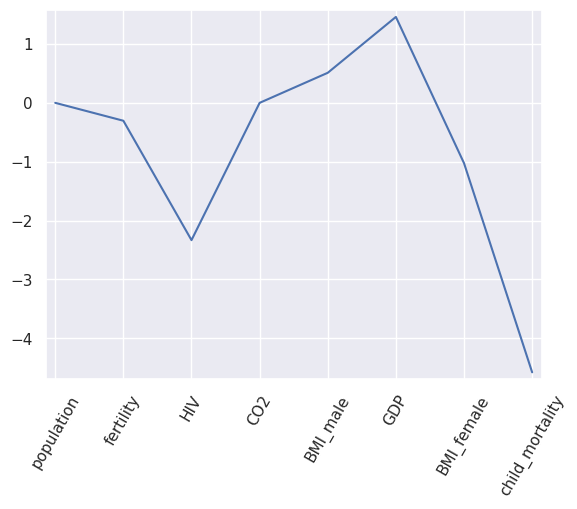

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd, numpy as np

df = pd.read_csv('gapminder.csv')
X = df.drop(columns=['life', 'Region'])
y = df['life']
df_columns = df.drop(columns=['life', 'Region']).columns

model = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha=0.4))
model.fit(X, y)
lasso_coef = model.named_steps['lasso'].coef_

plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


According to the lasso algorithm, it seems like `'child_mortality'` is the most important feature when predicting life expectancy.

### ***Exercise: Regularization II: Ridge***

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as $L1$ regularization because the regularization term is the $L1$ norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the $L2$ norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated  scores for each, using this function that we have defined for you, which plots the  score as well as standard error for each alpha:

```
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
```

Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the  score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.

### **Instructions**

* Instantiate a `Ridge` regressor and specify `normalize=True`.

* Inside the **`for`** loop:

  * Specify the `alpha` value for the regressor to use.
  * Perform 10-fold cross-validation on the regressor with the specified `alpha`. The data is available in the arrays `X` and `y`.

  * Append the average and the standard deviation of the computed cross-validated scores.

* Use the `display_plot()` function to visualize the scores and standard deviations.

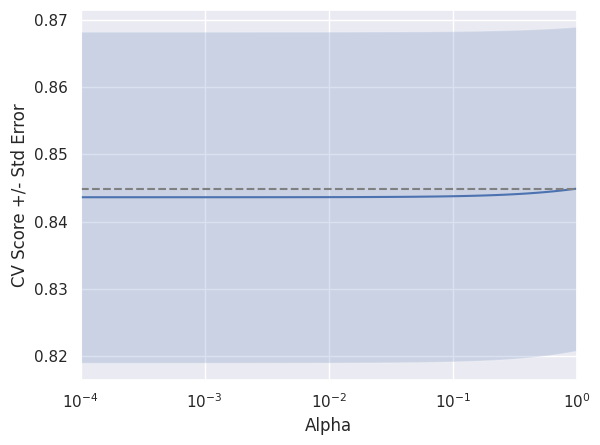

In [ ]:
# gapminder data

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Compute scores over range of alphas
for alpha in np.logspace(-4, 0, 50):

    # Create a ridge regressor: ridge
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha))

    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)

    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))

    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model?

# **Class Imbalance needs classification metrics**

* Spam mail classification
  * 99% are real
  * 1% are spam
* Model that predict all emails are real
  * 99% accurate
  * But cannot capture spam

# **Classification metrics**

* False negative: เป็น $(H_A)$ แต่เสือกบอก ไม่เป็น $(H_0)$
  * Same as <u>*Type 2*</u> Errors
* False positive: ไม่เป็น $(H_0)$ แต่เสือกบอกว่าเป็น $(H_A)$
  * Same as <u>*Type 1*</u> Errors

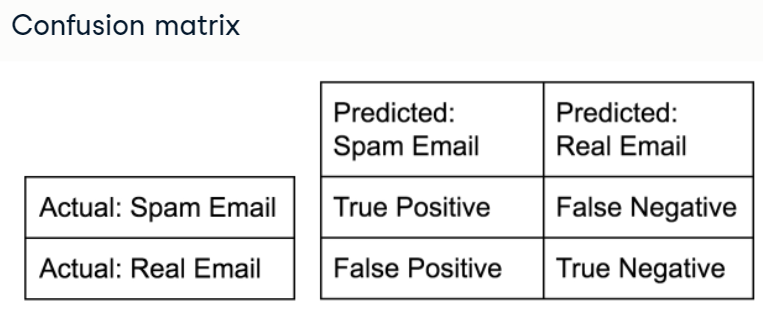

## ***Accuracy***

$$\frac{tp + tn}{tp + tn + fp + fn}$$

## ***Precision***
### ***The number of true positives over the number of positive predictions. Precision tells us how often the model was correct when it predicted true.***

$$\frac{tp}{tp + fp}$$
* ส่วนที่ทายว่าเป็นบวก หารด้วยตัวอย่างที่ทายว่าบวกทั้งหมด
* Precision สูงหมายความว่า ทายตัวอย่างที่เป็นบวกได้แม่นยำ ไม่ค่อยมีตัวอย่างลบที่ทายผิดมาเป็นบวก
* E.g. Not many real emails are predicted as spam

## ***Recall***
### ***The number of true positives over the number of <ins>actual positives</ins>. Recall answers the question, “What fraction of the positives did we get correct?”***

$$\frac{tp}{tp + fn}$$

* ส่วนที่ทายว่าเป็นบวก หารด้วยตัวอย่างที่บวกจริง + ตัวอย่างที่ค่าจริงบวก แต่ทายผิดเป็นลบ
* ค่า Recall สูง หมายความว่า ทายค่าตัวอย่างที่เป็นบวกได้เยอะ
* E.g. Predicted most spam correctly
## ***F1 Score***

$$2 \times \frac{precision \times recall}{precision + recall}$$

* The F1 score is bounded between 0 and 1. It will only achieve a value of 1 if both precision and recall are exactly 1.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

X, y = iris['data'], iris['target']
knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



### ***Exercise: Metrics for classification***

You evaluated the performance of your k-NN classifier based on its accuracy. However, accuracy is not always an informative metric.

The classification report consists of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class. The `precision`, `recall`, and `f1-score` columns, then, gave the respective metrics for that particular class.

Here, you'll work with the [PIMA Indians dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of `0` indicates that the patient does not have diabetes, while a value of `1` indicates that the patient does have diabetes.

The dataset has been loaded into a DataFrame `df` and the feature and target variable arrays `X` and `y` have been created for you. In addition, `sklearn.model_selection.train_test_split` and `sklearn.neighbors.KNeighborsClassifier` have already been imported.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

### **Instructions**

* Import `classification_report` and `confusion_matrix` from `sklearn.metrics`.
* Create training and testing sets with 40% of the data used for testing. Use a random state of `42`.
* Instantiate a k-NN classifier with `6` neighbors, fit it to the training data, and predict the labels of the test set.
* Compute and print the confusion matrix and classification report using the `confusion_matrix()` and `classification_report()` functions.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv('diabetes.csv')
X = df.drop(columns='diabetes')
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

# ***Logistic Regression***

For classification algorithms, there is a <u>**tradeoff between precision and recall**</u>.

*  Threshold parameter $p$ (defalut = 0.5): is chosen such that all model outputs <u>*above the threshold*</u> are given the label of **`true`**.
   * You then pick a threshold $p$ — if the predicted probability is above $p$, you predict 1; otherwise, you predict 0.
* As this $p$ increases, the model must be relatively more confident before assigning a label of `true`.
  * In this case, the model’s precision will increase (very confident when applying true label), but the recall will suffer -- False Negative ในขณะที่จริงๆแล้ว Positive จะมากขึ้น ทำให้ตัวหารใน $Recall = \dfrac{TP}{TP + FN}$ เพิ่มขึ้น ส่งผลให้ค่า Recall ลดลง (will apply false to some true cases that had a model output just below the raised threshold).

Machine learning practitioners have adapted a way to help us visualize this tradeoff. The visualization technique is known as the receiver operating characteristic – or more commonly used ***ROC*** – curve.

To understand this curve, consider two extremes choices for $p$:

* When $p = 1$, we will (almost surely) never predict any observation to have a label 1. In this case, the false positive rate will be equal to 0, as will the true positive rate.

     * True Positive Rate (TPR) = how many actual spams you correctly predicted → You predicted real email for every mail, so you missed all spams. ❌ TPR = 0

     * False Positive Rate (FPR) = how many real emails you incorrectly predicted as spam → Again, you predicted all email as real, so you didn't falsely mark any real emails as spams ✅ FPR = 0



* When $p = 0$, we will predict that all observations always have a label of 1. The false positive rate and true positive rates will be equal to 1.
     * So what does this mean? True Positive Rate (TPR) = how many spams you correctly caught → You predicted spams for all observations, so you definitely got all spams. ✅ So TPR = 1
     * False Positive Rate (FPR) = how many real emails you incorrectly predicted as spams → You also predicted spam for all the real emails ❌ So FPR = 1

The ROC curve traces the relationship between the false positive rate (on the x-axis) and the true positive rate (on the y-axis) as the probability ***threshold $p$*** is changed.

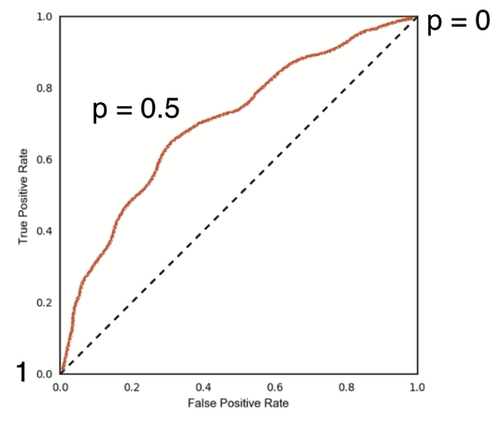

### The area under any other ROC curve would be less than 1. Thus, we could use the area under the curve (abbreviated AUC) as an objective metric in cross-validation.



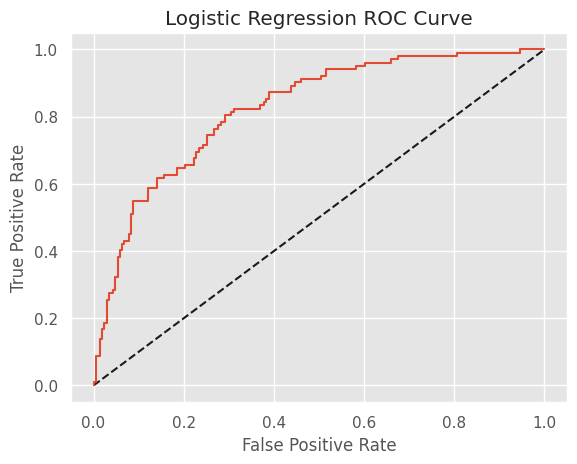

Initial AUC value is 0.8243


In [ ]:
logreg = LogisticRegression(max_iter=100000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

y_pred_prob = logreg.predict_proba(X_test)[:,1] # prob of predicting '1'.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
print(f'Initial AUC value is {roc_auc_score(y_test, y_pred_prob):.4f}')

### ***Exercise: Building a logistic regression model***

The feature and target variable arrays `X` and `y` have been pre-loaded, and `train_test_split` has been imported for you from `sklearn.model_selection`.

### **Instruction**

* Import:
   * `LogisticRegression` from `sklearn.linear_model`.
   * `confusion_matrix` and `classification_report` from `sklearn.metrics`.

* Create training and test sets with 40% of the data used for testing. Use a random state of 42.
* Instantiate a `LogisticRegression` classifier called `logreg`.
* Fit the classifier to the training data and predict the labels of the test set.
* Compute and print the confusion matrix and classification report.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('diabetes2.csv')
X = df.drop(columns='diabetes')
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)


logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[167  39]
 [ 38  64]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       206
           1       0.62      0.63      0.62       102

    accuracy                           0.75       308
   macro avg       0.72      0.72      0.72       308
weighted avg       0.75      0.75      0.75       308



### ***Exercise: Plotting an ROC curve***

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. Most classifiers in scikit-learn have a **`.predict_proba()`** method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the **`.predict_proba()`** method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as `logreg`.

### **Instructions**

* Import `roc_curve` from `sklearn.metrics`.
* Using the `logreg` classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set `X_test`. Save the result as `y_pred_prob`.
* Use the `roc_curve()` function with `y_test` and `y_pred_prob` and unpack the result into the variables `fpr`, `tpr`, and `thresholds`.
* Plot the ROC curve with `fpr` on the x-axis and `tpr` on the y-axis.

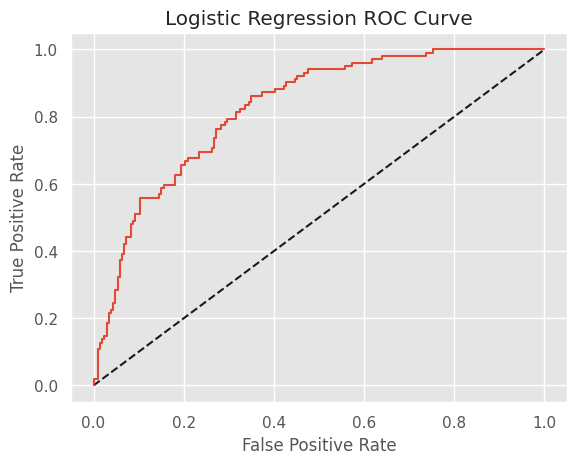

Initial AUC value is 0.8253


In [ ]:
from sklearn.metrics import roc_curve

df = pd.read_csv('diabetes2.csv')
X = df.drop(columns='diabetes')
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
print(f'Initial AUC value is {roc_auc_score(y_test, y_pred_prob):.4f}')

### ***Exercise: Precision-recall Curve***

When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as ***recall***. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the ***precision-recall*** curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

$$ Precision = \frac{TP}{TP+FP} $$
$$ Recall = \frac{TP}{TP+FN} $$

On the right, a precision-recall curve has been generated for the diabetes dataset. The classification report and confusion matrix are displayed in the IPython Shell.



```
[[170  36]
 [ 36  66]]
```



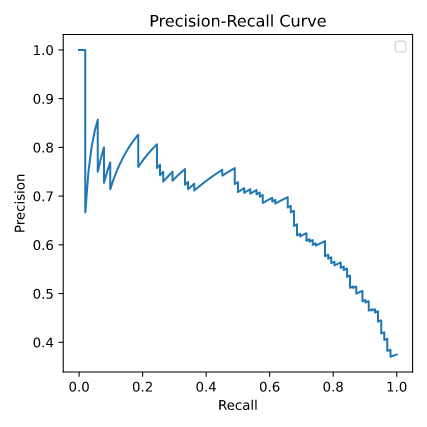

/tmp/ipython-input-13-1658454468.py:1: RuntimeWarning: invalid value encountered in divide
  precision = tpr / (tpr + fpr)


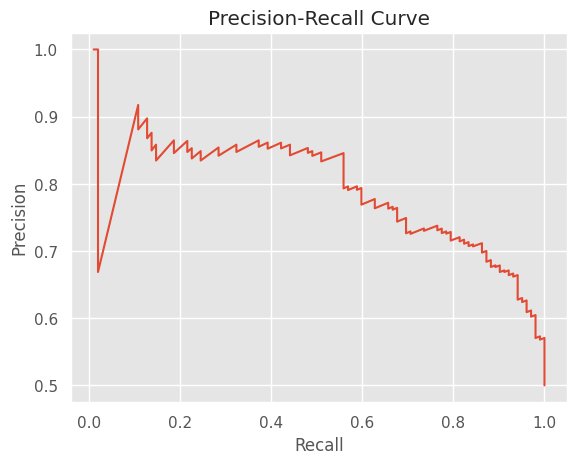

In [ ]:
precision = tpr / (tpr + fpr)
fnr = 1 - tpr
recall = tpr / (tpr + fnr) # มันก็เท่ากับ tpr เฉยๆปะอะ ?

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

* A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.

* Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes. นั่นจึงเป็นสาเหตุว่า `precision[0]=nan`

* When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.

# **Area Under the ROC Curve: AUC**

* The larger the area under the ROC curve, the better model

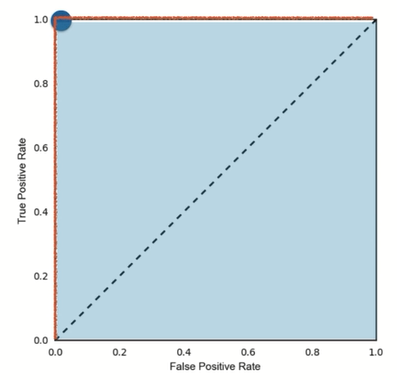

# ***AUC in scikit-learn***

In [ ]:
from sklearn.metrics import roc_auc_score

df = pd.read_csv('diabetes2.csv')
X = df.drop(columns='diabetes')
y = df['diabetes']

logreg = LogisticRegression(max_iter=10**5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

0.8252903102988768


# ***AUC using cross-validation***

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc', n_jobs=100)
print(cv_scores)

[0.80814815 0.80777778 0.82666667 0.87471698 0.83377358]


### ***Exercise: AUC computation***

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC is an informative metric to evaluate a model. <u>***If the AUC is greater than 0.5, the model is better than random guessing.***</u>

Calculate AUC scores using the **`roc_auc_score()`** function from **`sklearn.metrics`** as well as by performing cross-validation on the diabetes dataset.

`X` and `y`, along with training and test sets `X_train`, `X_test`, `y_train`, `y_test`, have been pre-loaded for you, and a logistic regression classifier `logreg` has been fit to the training data.

### **Instruction**

* Import `roc_auc_score` from `sklearn.metrics` and `cross_val_score` from `sklearn.model_selection`.
* Using the `logreg` classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set `X_test`. Save the result as `y_pred_prob`.
* Compute the AUC score using the `roc_auc_score()` function, the test set labels `y_test`, and the predicted probabilities `y_pred_prob`.
* Compute the AUC scores by performing 5-fold cross-validation. Use the `cross_val_score()` function and specify the scoring parameter to be `'roc_auc'`.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

df = pd.read_csv('diabetes2.csv')
X = df.drop(columns='diabetes')
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg = LogisticRegression(max_iter=10**5).fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_prob))
print(cross_val_score(logreg, X, y, cv=5, scoring='roc_auc', n_jobs=100))


0.8252903102988768
[0.81925926 0.8062963  0.8262963  0.87188679 0.84603774]


# **Hyperparameter Tuning**

* Choosing $\alpha$ in Ridge or Lasso
* Choosing `n_neighbors` in kNN

Below are an example of a grid of two hyperparameters: $c$ and $\alpha$.



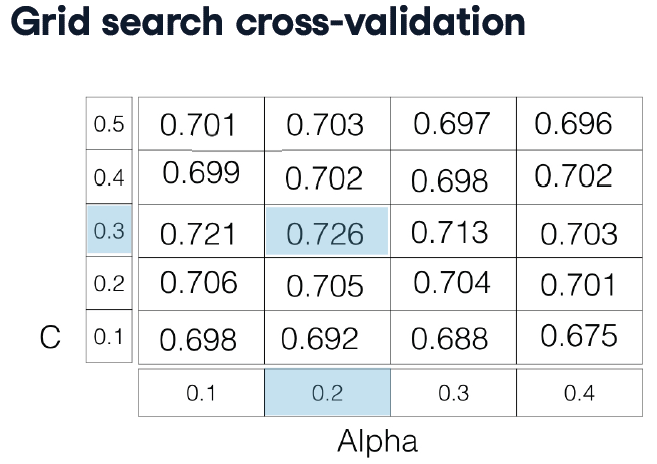

# ***GridSearchCV in scikit-learn***



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

### ***Exercise: Hyperparameter tuning with GridSearchCV***

How to tune the **`n_neighbors`** parameter of the **`KNeighborsClassifier()`** using **`GridSearchCV`** was demonstrated above on the voting dataset. You will now practice this by using logistic regression on the diabetes dataset instead!

Like the **`alpha`** parameter of ***lasso*** and ***ridge*** regularization that you saw earlier, logistic regression also has a regularization parameter: $C$. $C$ controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large  $C$ can lead to an overfit model, while a small $C$ can lead to an underfit model.

The hyperparameter space for $C$ has been setup for you. Your job is to use **`GridSearchCV`** and logistic regression to find the optimal  in this hyperparameter space. The feature array is available as `X` and target variable array is available as `y`.

You may be wondering ***why you aren't asked to split the data into training and test sets***. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes.

### **Instruction**

* Import `LogisticRegression` from `sklearn.linear_model` and `GridSearchCV` from `sklearn.model_selection`.

* Setup the hyperparameter grid by using `c_space` as the grid of values to tune  $C$ over.

* Instantiate a logistic regression classifier called `logreg`.
* Use `GridSearchCV` with 5-fold cross-validation to tune :
  * Inside `GridSearchCV()`, specify the classifier, parameter grid, and number of folds to use.
  * Use the `.fit()` method on the `GridSearchCV` object to fit it to the data `X` and `y`.

* Print the best parameter and best score obtained from `GridSearchCV` by accessing the `best_params_` and `best_score_` attributes of `logreg_cv`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np, pandas as pd

df = pd.read_csv('diabetes2.csv')
X = df.drop(columns='diabetes')
y = df['diabetes']

param_grid = {'C': np.logspace(-5, 8, 15)}
logreg = LogisticRegression(max_iter=10**6)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5).fit(X, y)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': np.float64(0.4393970560760795)}
Best score is 0.7682285035226212


 It looks like a `'C'` of 0.44 results in the best performance.

 ### ***Exercise: Hyperparameter tuning with RandomizedSearchCV***

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use **`RandomizedSearchCV`**, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using **`RandomizedSearchCV`**.

Here, you'll also be introduced to a new model: ***the Decision Tree***. Don't worry about the specifics of how this model works. Just like ***k-NN***, ***linear regression***, and ***logistic regression***,

* ***decision trees*** in scikit-learn have **`.fit()`** and **`.predict()`** methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as **`max_features`**, **`max_depth`**, and **`min_samples_leaf`**: This makes it an ideal use case for **`RandomizedSearchCV`**.

As before, the feature array `X` and target variable array `y` of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use **`RandomizedSearchCV`** to find the optimal hyperparameters.

### **Instructions**

* Import **`DecisionTreeClassifier`** from **`sklearn.tree`** and **`RandomizedSearchCV`** from **`sklearn.model_selection`**.

* Specify the parameters and distributions to sample from.

* Instantiate a `DecisionTreeClassifier`.

* Use `RandomizedSearchCV` with `5`-fold cross-validation to tune the hyperparameters:
    * Inside `RandomizedSearchCV()`, specify the classifier, parameter distribution, and number of folds to use.
    * Use the `.fit()` method on the `RandomizedSearchCV` object to fit it to the data `X` and `y`.

* Print the best parameter and best score obtained from `RandomizedSearchCV` by accessing the `best_params_` and `best_score_` attributes of `tree_cv`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np, pandas as pd

df = pd.read_csv('diabetes2.csv')
X = df.drop(columns='diabetes')
y = df['diabetes']

# Do not worry about this for now
param_distribution =  {"max_depth": [3, None],
                       "max_features": randint(1, 9),
                       "min_samples_leaf": randint(1, 9),
                       "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distribution, cv=5).fit(X, y)

print("Tuned Parameters: {}".format(tree_cv.best_params_))
print(f"Best score is {tree_cv.best_score_:.2f}")

Tuned Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 3}
Best score is 0.74


**`RandomizedSearchCV`** performs a random search over hyperparameters — so by default, it picks a different random sample of combinations each time.  That's why tuned parameters change every run.  `RandomizedSearchCV` will never outperform `GridSearchCV`. Instead, it is valuable because it saves on computation time.

# **Hold-out set**

How well can the model perform based on hyperparameters we chose on never before seen data?

* That's why using all data in cross validation is not recommended.
* Split data at the beginning into training set and hold-out set.


### ***Exercise: Hold-out set in practice I: Classification***

You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as `X` and `y`.

In addition to $C$, logistic regression has a `'penalty'` hyperparameter which specifies whether to use `'l1'` or `'l2'` regularization. Your job in this exercise is to create a hold-out set, tune the `'C'` and `'penalty'` hyperparameters of a logistic regression classifier using `GridSearchCV` on the training set.

### **Instructions**

* Create the hyperparameter grid:
  * Use the array `c_space` as the grid of values for `'C'`.
  * For `'penalty'`, specify a list consisting of `'l1'` and `'l2'`.

* Instantiate a logistic regression classifier.

* Create training and test sets. Use a `test_size` of `0.4` and `random_state` of `42`. In practice, the test set here will function as the hold-out set.

* Tune the hyperparameters on the training set using `GridSearchCV` with `5`-folds. This involves first instantiating the `GridSearchCV` object with the correct parameters and then fitting it to the training data.

* Print the best parameter and best score obtained from `GridSearchCV` by accessing the `best_params_` and `best_score_` attributes of `logreg_cv`.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd, numpy as np

df = pd.read_csv('diabetes2.csv')
X = df.drop(columns='diabetes')
y = df['diabetes']

param_grid = {'C': np.logspace(-5, 8, 15), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression(solver='liblinear', max_iter=10**7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5).fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': np.float64(3.727593720314938), 'penalty': 'l2'}
Best score is 0.7978260869565217


### ***Exercise: Hold-out set in practice II: Regression***

Remember ***lasso*** and ***ridge*** regression? Lasso used the $L1$ penalty to regularize, while ridge used the $L2$ penalty. There is another type of regularized regression known as the ***elastic net***. In elastic net regularization, the penalty term is a linear combination of the  $L1$ and $L2$  penalties:

$$ a \times L1 + b \times L2 $$

In scikit-learn, this term is represented by the `'l1_ratio'` parameter: An `'l1_ratio'` of `1` corresponds to an $L1$ penalty, and anything lower is a combination of $L1$ and $L2$.

In this exercise, you will `GridSearchCV` to tune the `'l1_ratio'` of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

### **Instructions**

* Import the following modules:
  * `ElasticNet` from `sklearn.linear_model`.
  * `mean_squared_error` from `sklearn.metrics`.
  * `GridSearchCV` and `train_test_split` from `sklearn.model_selection`.

* Create training and test sets, with 40% of the data used for the test set. Use a random state of `42`.

* Specify the hyperparameter grid for `'l1_ratio'` using `l1_space` as the grid of values to search over.

* Instantiate the `ElasticNet` regressor.

* Use `GridSearchCV` with `5`-fold cross-validation to tune `'l1_ratio'` on the training data `X_train` and `y_train`. This involves first instantiating the `GridSearchCV` object with the correct parameters and then fitting it to the training data.
* Predict on the test set and compute the $R^2$ and mean squared error.

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd, numpy as np

df = pd.read_csv('gapminder.csv')
X = df.drop(columns=['life', 'Region'])
y = df['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
param_grid = {'l1_ratio': np.linspace(0.01, 0.99, 30)}  # 0 and 1 make error
elas = ElasticNet()
elas_cv = GridSearchCV(elas, param_grid, cv=5).fit(X_train, y_train)
y_pred = elas_cv.predict(X_test)

print("Tuned ElasticNet l1 ratio: {}".format(elas_cv.best_params_))
print(elas_cv.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))

Tuned ElasticNet l1 ratio: {'l1_ratio': np.float64(0.21275862068965518)}
0.8666830015820468
10.069057086213997


# **Data Preprocessing**



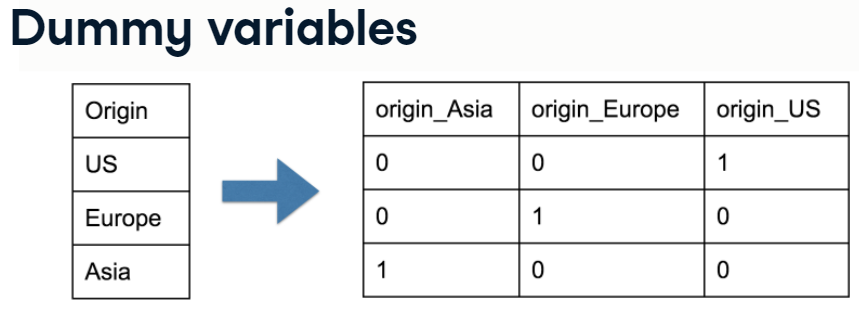

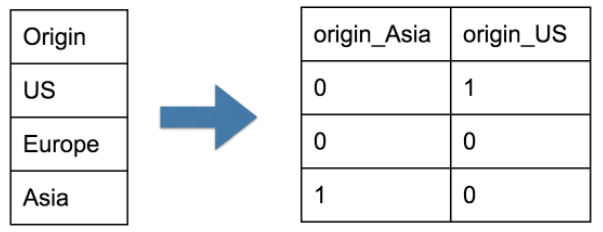

ต้องเอาออกไป 1 คอลัมน์ กันการนับซ้ำ ?

# ***Dealing with categorical features in Python***

* scikit-learn: **`OneHotEncoder()`**
* pandas: **`get_dummies()`**

In [ ]:
df = pd.read_csv('auto.csv')
display(df.head())
print("\n")
df_origin = pd.get_dummies(df)
display(df_origin.head())
print("\n")
df_origin = df_origin.drop('origin_Asia', axis=1)
display(df_origin.head())

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


### ***Exercise: Exploring categorical features***

The Gapminder dataset that you worked with contained a categorical `'Region'` feature.

Explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.

### **Instructions**

* Use pandas to create a boxplot showing the variation of life expectancy (`'life'`) by region (`'Region'`). To do so, pass the column names in to `df.boxplot()` (in that order).

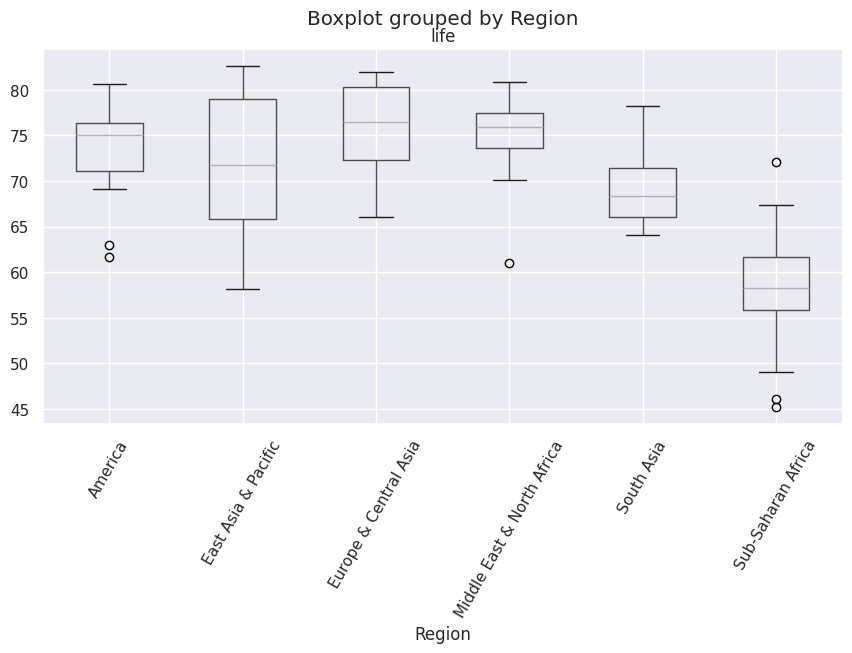

In [ ]:
df = pd.read_csv('gapminder.csv')

fig, ax = plt.subplots(figsize=(10, 5))
# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60, ax=ax)

# Show the plot
plt.show()

### ***Exercise: Creating dummy variables***

Scikit-learn does not accept non-numerical features. You saw in the previous exercise that the `'Region'` feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the `'Region'` feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.

### **Instructions**

* Use the pandas **`get_dummies()`** function to create dummy variables from the df DataFrame. Store the result as `df_region`.

* Print the columns of `df_region`.

* Use the **`get_dummies()`** function again, this time specifying **`drop_first=True`** to drop the unneeded dummy variable (in this case, `'Region_America'`).

* Print the new columns of `df_region` and take note of how one column was dropped.

In [ ]:
df = pd.read_csv('gapminder.csv')
df_region = pd.get_dummies(df)
print(df_region.columns, "\n")
df_region = pd.get_dummies(df, drop_first=True)
print(df_region.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object') 

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


Now that you have created the dummy variables, you can use the `'Region'` feature to predict life expectancy.

### ***Exercise: Regression with categorical features***

Having created the dummy variables from the `'Region'` feature, you can build regression models as you did before. Here, you'll use `ridge` regression to perform `5`-fold cross-validation.

The feature array `X` and target variable array `y` have been pre-loaded.

### **Instructions**

* Instantiate a `ridge` regressor called `ridge` with `alpha=0.5` and `normalize=True`.

* Perform `5`-fold cross-validation on `X` and `y` using the `cross_val_score()` function.

* Print the cross-validated scores.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df = pd.read_csv('gapminder.csv')
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns='life')
y = df['life']

ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.5))
print(cross_val_score(ridge, X, y, cv=5))

[0.82107258 0.80466392 0.89712164 0.80403652 0.93964611]


You now know how to build models using data that includes categorical features.

# ***Dropping missing data***

In [ ]:
df = pd.read_csv('diabetes.csv')

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

X = df.drop(columns='diabetes')
y = df['diabetes']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      541 non-null    float64
 4   insulin      394 non-null    float64
 5   bmi          757 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


# ***Imputing missing data***

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean') # ต้องใช้ np.nan แทน 'NaN' สำหรับ SimpleImputer
imp.fit(df)
X = imp.transform(df) # X is np.array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

# ***Imputing within a pipeline***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logreg = LogisticRegression()
steps = [('imputation', imp), ('logistic_regression', logreg)]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7402597402597403

### ***Exercise: Dropping missing data***


The unprocessed dataset has been loaded into a DataFrame `df`. Explore it in the IPython Shell with the `.head()` method. You will see that there are certain data points labeled with a `'?'`. These denote missing values. Different datasets encode missing values in different ways. Sometimes it may be a `'9999'`, other times a `0` - real-world data can be very messy! If you're lucky, the missing values will already be encoded as `NaN`. We use `NaN` because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as **`.dropna()`** and **`.fillna()`**, as well as scikit-learn's Imputation transformer `SimpleImputer()`.

In this exercise, your job is to convert the `'?'`s to `NaN`s, and then drop the rows that contain them from the DataFrame.

### **Instructions**

* Explore the DataFrame `df` in the IPython Shell. Notice how the missing value is represented.
* Convert all `'?'` data points to `np.nan`.
* Count the total number of `NaN`s using the `.isnull()` and `.sum()` methods. * Drop the rows with missing values from df using `.dropna()`.


In [ ]:
df = pd.read_csv('voting.csv').drop(columns='Unnamed: 0')
display(df.head())

# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

### ***Exericse: Imputing missing data in a ML Pipeline I***

As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same `.fit()` and `.predict()` methods as before.

### **Instructions**

* Import `SimpleImputer` from `sklearn.impute` and `SVC` from `sklearn.svm`. SVC stands for Support Vector Classification, which is a type of SVM.

* Setup the Imputation transformer to impute missing data (represented as `'NaN'`) with the `'most_frequent'` value in the column (`axis=0`).

* Instantiate a `SVC` classifier. Store the result in `clf`.

* Create the steps of the pipeline by creating a list of tuples:
  * The first tuple should consist of the imputation step, using `imp`.
  * The second should consist of the `classifier`.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

#  No axis argument anymore — the new version always imputes column-wise (i.e., axis=0 behavior is now the default and only behavior).
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
clf = SVC()
steps = [('imputation', imp), ('classifier', clf)]


Having set up the pipeline steps, you can now use it for classification.

### ***Exercise: Imputing missing data in a ML Pipeline II***

Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the `.fit()` and `.predict()` methods on pipelines just as you did with your classifiers and regressors!

Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have been set up for you, and the feature array `X` and target variable array `y` have been pre-loaded. Additionally, `train_test_split` and `classification_report` have been imported from `sklearn.model_selection` and `sklearn.metrics` respectively.

### **Instructions**

* Import the following modules:
  * **`SimpleImputer`** from `sklearn.impute` and `Pipeline` from `sklearn.pipeline`.
  * `SVC` from `sklearn.svm`.

* Create the pipeline using `Pipeline()` and `steps`.
* Create training and test sets. Use 30% of the data for testing and a random state of `42`.
* Fit the pipeline to the training set and predict the labels of the test set.
* Compute the classification report.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

df = pd.read_csv('voting.csv').drop(columns='Unnamed: 0')
X = df.drop(columns='party')
y = df['party']
imp = SimpleImputer(missing_values='?', strategy='most_frequent')
clf = SVC()
steps = [('imputation', imp), ('classifier', clf)]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.99      0.99      0.99        80
  republican       0.98      0.98      0.98        51

    accuracy                           0.98       131
   macro avg       0.98      0.98      0.98       131
weighted avg       0.98      0.98      0.98       131



Your pipeline has performed imputation as well as classification!

# **Centering and Scaling**

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## ***Why scale your data?***
* Many models use some form of distance to inform them
* Features on larger scales can unduly influence the model
* Example: k-NN uses distance explicitly when making predictions
* We want features to be on a similar scale
* Normalizing (or scaling and centering)

1. Standardization: subtract mean and divide by variance
  * centered around 0 with  variance = 1 for all features
2. Subtract minimum and divide by the range
  *  $\min = 0, \max = 0$
3. make range = $(-1, 1)$

## ***Scaling in scikit-learn***



In [ ]:
from sklearn.preprocessing import scale

df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop(columns='quality').values
y = df['quality']

X_scaled = scale(X)
print(np.mean(X), np.std(X))
print(np.mean(X_scaled), np.std(X_scaled))

8.134219224515322 16.726533979432848
-2.7647703016329102e-15 1.0


## ***Scaling in a pipeline***

In [ ]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop(columns='quality')
y = df['quality']

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(knn_scaled.score(X_test, y_test))

knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

0.615625
0.615625
0.49375


## ***CV and scaling in a pipeline***



In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop(columns='quality').values
y = df['quality'] <= 5
steps = [('scaler', StandardScaler()), ('fuck', KNeighborsClassifier())] # any name
pipeline = Pipeline(steps)

# ถ้าใน pipeline ต้องใช้ knn__n_neighbors จะใช้แค่ n_neighbors ไม่ได้
param_grid = {'fuck__n_neighbors': np.arange(1, 50)} # key in param pipeline comes from above followed by __

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

cv = GridSearchCV(pipeline, param_grid)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'fuck__n_neighbors': np.int64(1)}
0.753125
              precision    recall  f1-score   support

       False       0.79      0.75      0.77       176
        True       0.71      0.76      0.73       144

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320



### ***Exercise: Centering and scaling your data***

Can a model  improve if the features are scaled? This is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

You will now explore scaling for yourself on a new dataset - White Wine Quality! We have used the `'quality'` feature of the wine to create a binary target variable: If `'quality'` is less than `5`, the target variable is `1`, and otherwise, it is `0`.

The DataFrame has been pre-loaded as `df`, along with the feature and target variable arrays `X` and `y`. Notice how some features seem to have different units of measurement. `'density'`, for instance, takes values between `0.98` and `1.04`, while `'total sulfur dioxide'` ranges from `9` to `440`. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.

### **Instrctions**

* Import `scale` from `sklearn.preprocessing`.
* Scale the features `X` using `scale()`.
* Print the mean and standard deviation of the unscaled features `X`, and then the scaled features `X_scaled`. Use the numpy functions `np.mean()` and `np.std()` to compute the mean and standard deviations.

In [ ]:
import pandas as pd, numpy as np
from sklearn.preprocessing import scale

df = pd.read_csv('white-wine.csv')
X = df.drop(columns='quality').values
X_scaled = scale(X)
print(f'mean X = {np.mean(X):.2f}, std X = {np.std(X):.2f}')
print(f'mean X_scaled = {np.mean(X_scaled):.2f}, std X_scaled = {np.std(X_scaled):.2f}')

mean X = 18.43, std X = 41.54
mean X_scaled = 0.00, std X_scaled = 1.00


Notice the difference in the mean and standard deviation of the scaled features compared to the unscaled features.

### ***Exercise: Centering and scaling in a pipeline***

See for yourself whether or not scaling the features of the Red Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

The feature array and target variable array have been pre-loaded as `X` and `y`. Additionally, `KNeighborsClassifier` and `train_test_split` have been imported from `sklearn.neighbors` and `sklearn.model_selection`, respectively.

### **Instructions**

* Import the following modules:
  * `StandardScaler` from `sklearn.preprocessing`.
  * `Pipeline` from `sklearn.pipeline`.

* Complete the steps of the pipeline with `StandardScaler()` for `'scaler'` and `KNeighborsClassifier()` for `'knn'`.

* Create the pipeline using `Pipeline()` and `steps`.

* Create training and test sets, with 30% used for testing. Use a random state of `42`.

* Fit the pipeline to the training set.
* Compute the accuracy scores of the scaled and unscaled models by using the `.score()` method inside the provided print() functions.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop(columns='quality').values
y = df['quality'] <=5

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipline = Pipeline(steps)
knn_scaled = pipeline.fit(X_train, y_train)
print(knn_scaled.score(X_test, y_test))
knn = KNeighborsClassifier().fit(X_train, y_train)
print(knn.score(X_test, y_test))


0.7583333333333333
0.6708333333333333


It looks like scaling has significantly improved model performance!

### ***Exercise: Bringing it all together I: Pipeline for classification***

It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are $C$ and $\gamma$. $C$ controls the regularization strength. It is analogous to the $C$ you tuned for logistic regression, while $\gamma$ controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this lesson.

The following modules and functions have been pre-loaded: `Pipeline`, `SVC`, `train_test_split`, `GridSearchCV`, `classification_report`, `accuracy_score`. The feature and target variable arrays `X` and `y` have also been pre-loaded.

### **Instructions**

* Setup the pipeline with the following steps:
  * Scaling, called `'scaler'` with `StandardScaler()`.
  * Classification, called `'SVM'` with `SVC()`.
* Specify the hyperparameter space using the following notation: `'step_name__parameter_name'`. Here, the `step_name` is `SVM`, and the `parameter_name`s are `C` and `gamma`.

* Create training and test sets, with 20% of the data used for the test set. Use a random state of 21.

* Instantiate `GridSearchCV` with the pipeline and hyperparameter space and fit it to the training set. Use 3-fold cross-validation (This is the default, so you don't have to specify it).

* Predict the labels of the test set and compute the metrics. The metrics have been computed for you.

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()), ('SVM', SVC())])
params = {'SVM__C': [1, 10, 100], 'SVM__gamma': [0.1, 0.01]}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
cv = GridSearchCV(pipeline, param_grid=params).fit(X_train, y_train)
y_pred = cv.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

0.778125
              precision    recall  f1-score   support

       False       0.81      0.77      0.79       171
        True       0.75      0.79      0.77       149

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


### ***Exercise: Bringing it all together II: Pipeline for regression***

For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values. Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an `ElasticNet` to the Gapminder data. You will then tune the `l1_ratio` of your `ElasticNet` using `GridSearchCV`.

All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as `X` and `y`.

### **Instructions**

*  Set up a pipeline with the following steps:
  * `'imputation'`, which uses the `Imputer()` transformer and the `'mean'` strategy to impute missing data (`'NaN'`) using the mean of the column.
  * `'scaler'`, which scales the features using `StandardScaler()`.
  * `'elasticnet'`, which instantiates an `ElasticNet()` regressor.

* Specify the hyperparameter space for the  $L1$ ratio using the following notation: `'step_name__parameter_name'`. Here, the `step_name` is `elasticnet`, and the `parameter_name` is `l1_ratio`.

* Create training and test sets, with 40% of the data used for the test set. Use a random state of `42`.

* Instantiate `GridSearchCV` with the pipeline and hyperparameter space. Use `3`-fold cross-validation (This is the default, so you don't have to specify it).
* Fit the `GridSearchCV` object to the training set.
* Print best parameters and $R^2$


In [2]:
df = pd.read_csv('gapminder.csv')
X = df.drop(columns=['life', 'Region'])
y = df['life']

pipeline = Pipeline([('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()),
                     ('elasticnet', ElasticNet(max_iter=999999999))])


param_grid = {'elasticnet__l1_ratio': np.linspace(0.01, 0.99,30)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
cv = GridSearchCV(pipeline, param_grid, cv=3)
cv.fit(X_train, y_train)

# Compute and print the metrics
print("Tuned ElasticNet Alpha: {}".format(cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(cv.score(X_test, y_test)))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': np.float64(0.99)}
Tuned ElasticNet R squared: 0.8860790743049125


You have now mastered the fundamentals of supervised learning with scikit-learn!